# Setup

In [ ]:
!pip install scanpy
!pip install numpy
!pip install pandas
!pip install matplotlib.pyplot
!pip install AnnData

import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


     |████████████████████████████████| 2.0 MB 5.0 MB/s 
     |████████████████████████████████| 86 kB 2.7 MB/s 
     |████████████████████████████████| 96 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 15.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=fde8be5e1c8f7973e902048f32bee2426ed8c0e5e78643c735d3e23bae3b3d43
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=1f37f70aa60f7da676ce2efde53ea4350d40101cf76cc9ef92095242177b4095
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=90553e3934a354ed44128623d0d717466691bf17e2ac885eef2048fd0f6970e5
  Stored in directory: /root/.cache/pi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: ignored

# Blattman Preprocessing and 2D Embeddings/Clustering

In [ ]:
dense1 = sc.read('GSM4192509_394A_R2_trimmed_v4_v11_threshold_1_unfiltered_gene_matrix.txt', delimiter = '\t')
dense1

In [ ]:
dense2 = dense1.copy()

In [ ]:
dense3 = dense1.copy()

In [ ]:
sc.pp.calculate_qc_metrics(dense2, inplace= True)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_qc.py:422: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


In [ ]:
dense2

AnnData object with n_obs × n_vars = 29548 × 2423
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [ ]:
dense2 = dense2[:,:2418]
dense2

View of AnnData object with n_obs × n_vars = 29548 × 2418
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [ ]:
sc.pp.filter_cells(dense2,min_counts=15)
sc.pp.filter_genes(dense2, min_counts = 5)
#sc.pp.filter_cells(dense2,max_counts = 2000)
sc.pp.filter_genes(dense2,min_cells = 5)

In [ ]:
dense2

AnnData object with n_obs × n_vars = 12267 × 1984
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_cells'

In [ ]:
sc.pp.normalize_total(dense2, inplace = True)
dense2.obs['cell_sum']=dense2.X.sum(axis=1)
dense2.obs['cell_sum']

394A_bc1_10_bc2_10_bc3_79_none_0       201.000031
394A_bc1_10_bc2_11_bc3_7_GFP_1         200.999985
394A_bc1_10_bc2_12_bc3_83_GFP_3        200.999985
394A_bc1_10_bc2_15_bc3_43_none_5       201.000000
394A_bc1_10_bc2_15_bc3_7_GFP_6         201.000000
                                          ...    
394A_bc1_9_bc2_95_bc3_37_none_29540    201.000000
394A_bc1_9_bc2_95_bc3_43_GFP_29541     201.000031
394A_bc1_9_bc2_9_bc3_36_RFP_29544      201.000000
394A_bc1_9_bc2_9_bc3_50_GFP_29545      201.000031
394A_bc1_9_bc2_9_bc3_84_none_29547     200.999985
Name: cell_sum, Length: 12267, dtype: float32

In [ ]:
sc.pp.pca(dense2, n_comps = 100)

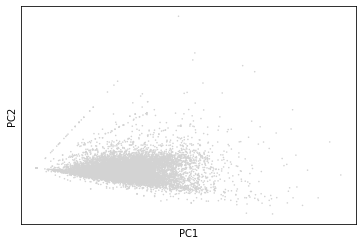

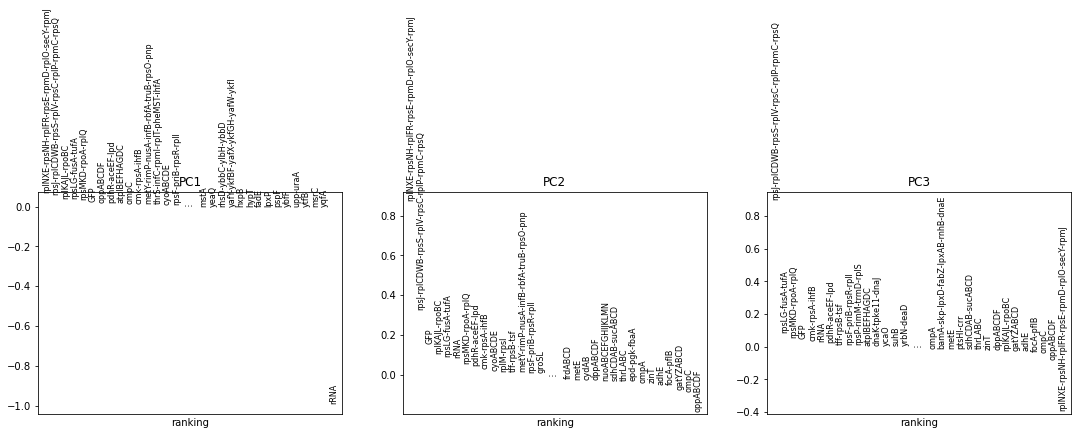

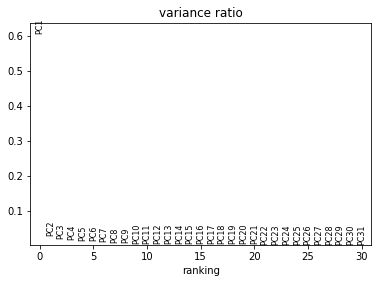

In [ ]:
sc.pl.pca_overview(dense2)

In [ ]:
import anndata as ad

In [ ]:
data_log = sc.pp.log1p(dense2.X,base=10)
ad_log = ad.AnnData(data_log)
ad_log.obs = dense2.obs
ad_log.var = dense2.var

In [ ]:
#sc.pp.regress_out(ad_log,['total_counts'])
sc.pp.scale(ad_log,max_value=10)

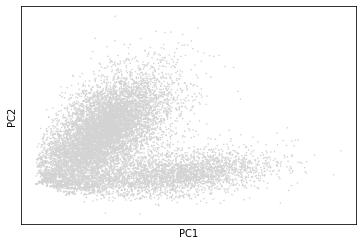

In [ ]:
sc.pp.pca(ad_log,n_comps = 100)
sc.pl.pca(ad_log)

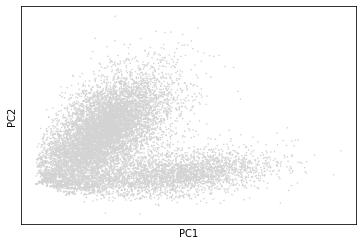

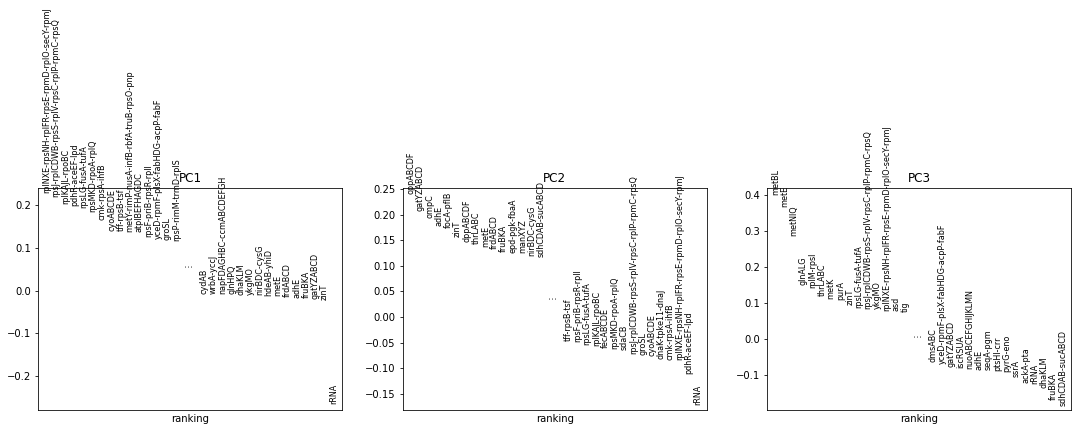

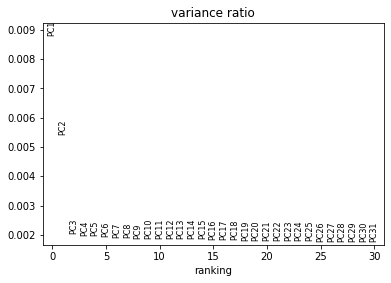

In [ ]:
sc.pl.pca_overview(ad_log)

In [ ]:
express = []
for i in ad_log.obs_names:
    if 'none' in i:
        express.append('none')
    elif 'RFP' in i:
        express.append('RFP')
    elif 'GFP' in i:
        express.append('GFP')
ad_log.obs['express']= express
ad_log.obs  

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts,cell_sum,express
394A_bc1_10_bc2_10_bc3_79_none_0,28,3.367296,202.0,5.313206,100.000000,100.0,100.0,100.0,202.0,201.000031,none
394A_bc1_10_bc2_11_bc3_7_GFP_1,40,3.713572,431.0,6.068426,100.000000,100.0,100.0,100.0,429.0,200.999985,GFP
394A_bc1_10_bc2_12_bc3_83_GFP_3,71,4.276666,755.0,6.628041,97.218543,100.0,100.0,100.0,747.0,200.999985,GFP
394A_bc1_10_bc2_15_bc3_43_none_5,6,1.945910,25.0,3.258096,100.000000,100.0,100.0,100.0,25.0,201.000000,none
394A_bc1_10_bc2_15_bc3_7_GFP_6,43,3.784190,469.0,6.152733,100.000000,100.0,100.0,100.0,468.0,201.000000,GFP
...,...,...,...,...,...,...,...,...,...,...,...
394A_bc1_9_bc2_95_bc3_37_none_29540,31,3.465736,232.0,5.451038,100.000000,100.0,100.0,100.0,232.0,201.000000,none
394A_bc1_9_bc2_95_bc3_43_GFP_29541,26,3.295837,355.0,5.874931,100.000000,100.0,100.0,100.0,353.0,201.000031,GFP
394A_bc1_9_bc2_9_bc3_36_RFP_29544,50,3.931826,454.0,6.120297,100.000000,100.0,100.0,100.0,452.0,201.000000,RFP
394A_bc1_9_bc2_9_bc3_50_GFP_29545,74,4.317488,971.0,6.879356,97.528321,100.0,100.0,100.0,970.0,201.000031,GFP


In [ ]:
sc.pp.neighbors(ad_log, n_neighbors = 15)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
sc.tl.tsne(ad_log)
sc.tl.umap(ad_log)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


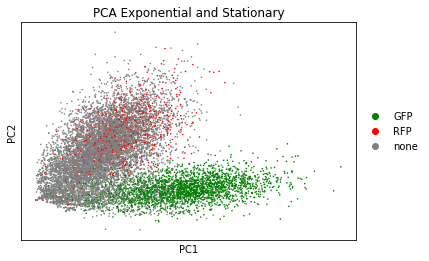

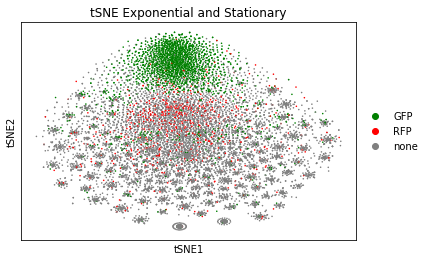

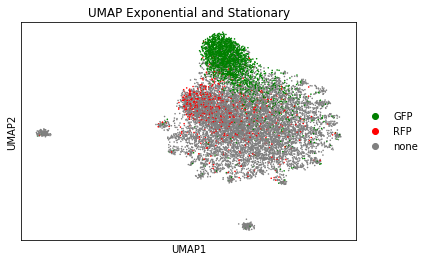

In [ ]:
sc.pl.pca(ad_log, color = ['express'], title = 'PCA Exponential and Stationary', palette = {'RFP':'red', 'GFP':'green', 'none':'grey'})
sc.pl.tsne(ad_log, color = ['express'], title = 'tSNE Exponential and Stationary')
sc.pl.umap(ad_log, color = ['express'], title = 'UMAP Exponential and Stationary')

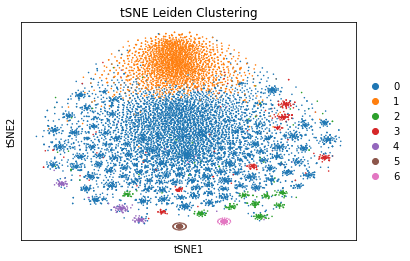

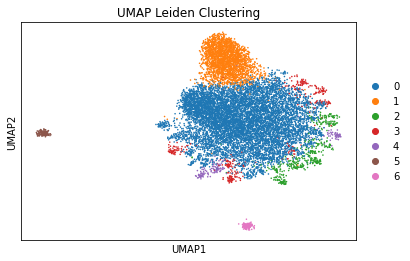

In [ ]:
!pip install leidenalg
sc.tl.leiden(ad_log, resolution = 0.3, key_added = 'Res 0.2')
sc.pl.tsne(ad_log,color = ['Res 0.2'], title = 'tSNE Leiden Clustering')
sc.pl.umap(ad_log, color = ['Res 0.2'], title = 'UMAP Leiden Clustering')

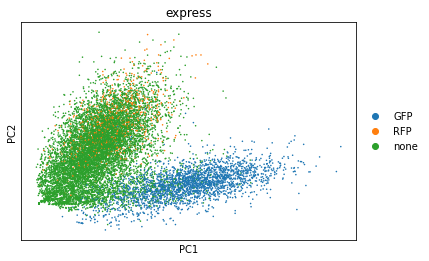

In [ ]:
sc.pp.filter_cells(dense3,min_counts=15)
sc.pp.filter_cells(dense3,max_counts = 2000)
sc.pp.filter_genes(dense3,min_cells = 5)

sc.pp.normalize_total(dense3, inplace = True)
dense3.obs['cell_sum']=dense3.X.sum(axis=1)
dense3.obs['cell_sum']

data_log3 = sc.pp.log1p(dense3.X,base=10)
ad_log3 = ad.AnnData(data_log3)
ad_log3.obs = dense3.obs
ad_log3.var = dense3.var

#sc.pp.regress_out(ad_log3,['total_counts']) DID NOT USE (Exp and Stationary phase should have differences in library size)
sc.pp.scale(ad_log3,max_value=10)

ad_log3.obs['express']= express

sc.pp.pca(ad_log3,n_comps = 100)
sc.pl.pca(ad_log3, color = ['express'])

In [ ]:
sc.pp.neighbors(ad_log3, n_neighbors = 15)
sc.tl.tsne(ad_log3)
sc.tl.umap(ad_log3)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


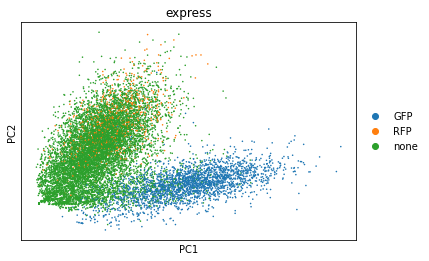

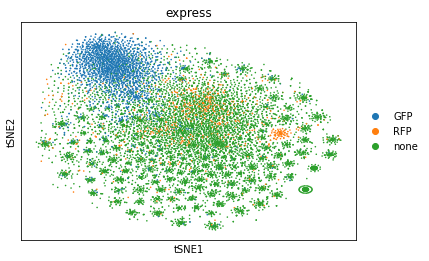

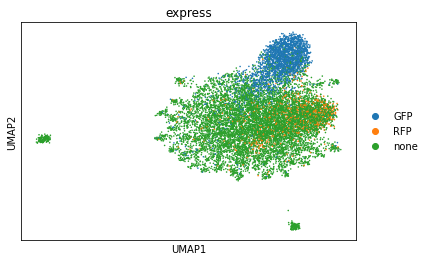

In [ ]:
sc.pl.pca(ad_log3, color = ['express'])
sc.pl.tsne(ad_log3, color = ['express'], wspace = 0.2)
sc.pl.umap(ad_log3, color = ['express'], wspace = 0.2)

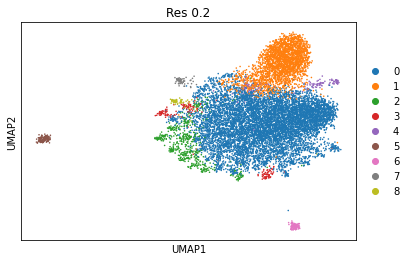

In [ ]:
sc.tl.leiden(ad_log3, resolution = 0.3, key_added = 'Res 0.2')
sc.pl.umap(ad_log3,color = ['Res 0.2'])

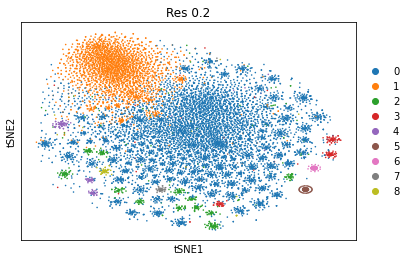

In [ ]:
sc.pl.tsne(ad_log3, color=['Res 0.2'])